In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
! wget wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv -O data-week-6.csv 

--2023-10-22 20:55:37--  http://wget/
Resolving wget (wget)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address ‘wget’
--2023-10-22 20:55:37--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘data-week-6.csv’

data-week-6.csv     100%[===================>]   1,36M  2,95MB/s    in 0,5s    

2023-10-22 20:55:38 (2,95 MB/s) - ‘data-week-6.csv’ saved [1423529/1423529]

FINISHED --2023-10-22 20:55:38--
Total wall clock time: 0,9s
Downloaded: 1 files, 1,4M in 0,5s (2,95 MB/s)


In [3]:
df = pd.read_csv('data-week-6.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Prepare Data

In [4]:
df = df[df.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])]

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.total_bedrooms = df.total_bedrooms.fillna(0)

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<Axes: xlabel='median_house_value', ylabel='Count'>

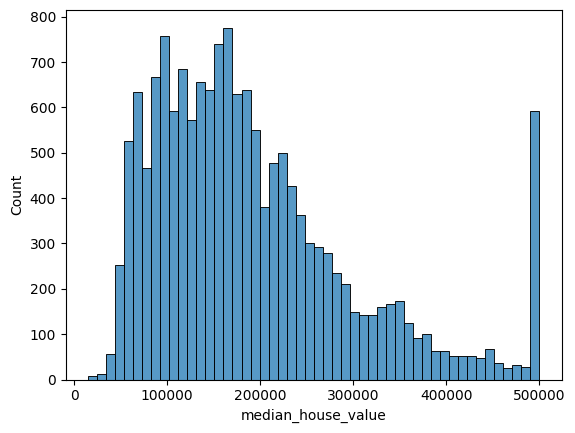

In [8]:
sns.histplot(df.median_house_value, bins=50)

In [9]:
df.median_house_value = np.log1p(df.median_house_value)

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973866,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287657,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,12.419574,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,12.554971,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,12.287196,<1H OCEAN


<Axes: xlabel='median_house_value', ylabel='Count'>

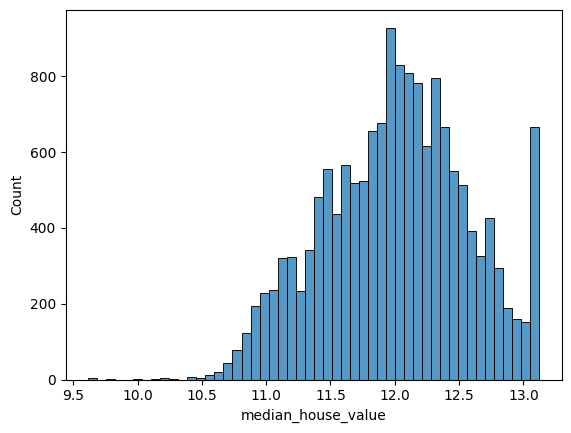

In [11]:
sns.histplot(df.median_house_value, bins=50)

In [12]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df), len(df_train), len(df_val), len(df_test)

(15687, 9411, 3138, 3138)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [14]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,<1H OCEAN


In [15]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=True)

# Question 1

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [17]:
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [18]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



# Question 2

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [20]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [21]:
rmse = mean_squared_error(y_val, y_pred)
rmse

0.06011702038882419

# Question 3

In [22]:
rs = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred)
    rs.append((n, rmse))

columns = ['n_estimators', 'rmse']
df_rmses = pd.DataFrame(rs, columns=columns)

In [23]:
df_rmses

,n_estimators,rmse
0,10,0.060117
1,20,0.056965
2,30,0.056115
3,40,0.055350
4,50,0.055163
5,60,0.054950
6,70,0.054911
7,80,0.054980
8,90,0.054905
9,100,0.054847


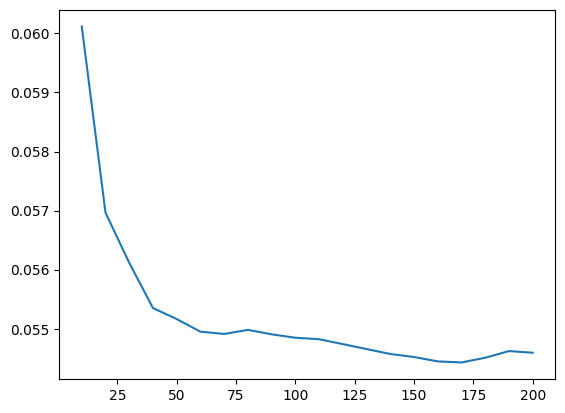

In [24]:
plt.plot(df_rmses.n_estimators, df_rmses.rmse)

# Question 4

In [25]:
rs = []

for m in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1, max_depth=m)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred)
        rs.append((m, n, rmse))

columns = ['max_depth', 'n_estimators', 'rmse']
df_rmses = pd.DataFrame(rs, columns=columns)

In [26]:
df_rmses

,max_depth,n_estimators,rmse
0,10,10,0.062839
1,10,20,0.061233
2,10,30,0.060654
3,10,40,0.060053
4,10,50,0.060253
...,...,...,...
75,25,160,0.054487
76,25,170,0.054493
77,25,180,0.054584
78,25,190,0.054695


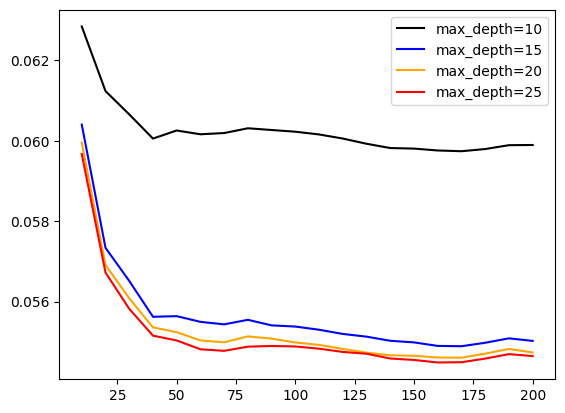

In [27]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [10, 15, 20, 25]

for m, c in zip(values, colors):
    df_subset = df_rmses[df_rmses.max_depth == m]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse, color=c, label=f'max_depth={m}')

plt.legend()

# Question 5

In [28]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1, max_depth=20)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [29]:
l = list(zip(dv.get_feature_names_out(), rf.feature_importances_))
l.sort(key=lambda x: x[1])

In [30]:
l

[('households', 0.015020868392390856),
 ('total_bedrooms', 0.015894018592137876),
 ('total_rooms', 0.02151782701191468),
 ('population', 0.027158512272116596),
 ('housing_median_age', 0.030305029123174957),
 ('ocean_proximity=INLAND', 0.07380644294558006),
 ('longitude', 0.08627637578575545),
 ('latitude', 0.10195626000240125),
 ('ocean_proximity=<1H OCEAN', 0.29247296545343104),
 ('median_income', 0.33559170042109715)]

# Question 6

In [1]:
!pip install -q xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [32]:
import xgboost as xgb

In [33]:
features = list(dv.get_feature_names_out())
features= [i.replace("<", "-") for i in features]

In [34]:
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=-1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [35]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [36]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [37]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [38]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)

[0]	train-rmse:8.07364	val-rmse:8.07348
[5]	train-rmse:1.38983	val-rmse:1.38852
[10]	train-rmse:0.33195	val-rmse:0.34802
[15]	train-rmse:0.22197	val-rmse:0.25614
[20]	train-rmse:0.20036	val-rmse:0.24508
[25]	train-rmse:0.18991	val-rmse:0.24021
[30]	train-rmse:0.18204	val-rmse:0.23833
[35]	train-rmse:0.17091	val-rmse:0.23452
[40]	train-rmse:0.16422	val-rmse:0.23379
[45]	train-rmse:0.15756	val-rmse:0.23302
[50]	train-rmse:0.15210	val-rmse:0.23262
[55]	train-rmse:0.14633	val-rmse:0.23167
[60]	train-rmse:0.14218	val-rmse:0.23160
[65]	train-rmse:0.13898	val-rmse:0.23169
[70]	train-rmse:0.13471	val-rmse:0.23108
[75]	train-rmse:0.13072	val-rmse:0.23036
[80]	train-rmse:0.12835	val-rmse:0.23045
[85]	train-rmse:0.12534	val-rmse:0.23010
[90]	train-rmse:0.12175	val-rmse:0.22957
[95]	train-rmse:0.11894	val-rmse:0.22906
[99]	train-rmse:0.11656	val-rmse:0.22897


In [39]:
xgb_params['eta'] = 0.1
model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)

[0]	train-rmse:10.37455	val-rmse:10.37545
[5]	train-rmse:6.13432	val-rmse:6.13237
[10]	train-rmse:3.63299	val-rmse:3.62939
[15]	train-rmse:2.15901	val-rmse:2.15616
[20]	train-rmse:1.29412	val-rmse:1.29329
[25]	train-rmse:0.78993	val-rmse:0.79341
[30]	train-rmse:0.50217	val-rmse:0.51148
[35]	train-rmse:0.34590	val-rmse:0.36370
[40]	train-rmse:0.26743	val-rmse:0.29345
[45]	train-rmse:0.23015	val-rmse:0.26316
[50]	train-rmse:0.21121	val-rmse:0.24925
[55]	train-rmse:0.20246	val-rmse:0.24352
[60]	train-rmse:0.19692	val-rmse:0.24081
[65]	train-rmse:0.19120	val-rmse:0.23867
[70]	train-rmse:0.18715	val-rmse:0.23708
[75]	train-rmse:0.18364	val-rmse:0.23546
[80]	train-rmse:0.17941	val-rmse:0.23424
[85]	train-rmse:0.17620	val-rmse:0.23306
[90]	train-rmse:0.17320	val-rmse:0.23231
[95]	train-rmse:0.17056	val-rmse:0.23128
[99]	train-rmse:0.16845	val-rmse:0.23052
